In [2]:
import os
import glob
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from facenet_tensorflow import Facenet

In [11]:
import os
import glob
import cv2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from facenet_tensorflow import Facenet

# Define the directory containing test images
test_dir ='dataset/test'

def get_true_labels_and_predictions(facenet, test_dir):
    true_labels = []
    predicted_labels = []


    for identity_dir in sorted(glob.glob(os.path.join(test_dir, '*'))):
        if not os.path.isdir(identity_dir):
            continue  # Skip non-directory files


        true_label = os.path.basename(identity_dir)
        for image_path in sorted(glob.glob(os.path.join(identity_dir, '*'))):
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}")
                continue
            
            faces = facenet.detect_faces_mtcnn(image)
            
            if len(faces) > 0:
                preprocessed_faces = [facenet.preprocess_face(face) for _, _, _, _, face in faces]
                embeddings = facenet.generate_embeddings(preprocessed_faces)
                recognized_faces = facenet.recognize_faces(facenet.known_embeddings, facenet.known_labels, embeddings)
                
                # If a face is recognized, append the label, otherwise mark as "Unknown"
                if recognized_faces:
                    predicted_labels.append(recognized_faces[0][0])
                else:
                    predicted_labels.append("Unknown")
                
                # Append the true label for the image
                true_labels.append(true_label)
            else:
                print(f"No face detected in {image_path}.")
                predicted_labels.append("Unknown")
                true_labels.append(true_label)
    
    return true_labels, predicted_labels

def calculate_metrics_and_save_confusion_matrix(true_labels, predicted_labels, output_path):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Save the confusion matrix to a CSV file
    pd.DataFrame(conf_matrix).to_csv(output_path, index=False, header=False)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Print the metrics
    print("\nMetrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [13]:
facenet = Facenet(
        input=test_dir, 
        output='facenet_test_results',
        database='dataset/test_db',
        facenet_model_path='models/20180402-114759.pb'
    )

facenet.process_database()
true_labels, predicted_labels = get_true_labels_and_predictions(facenet, test_dir)


output_path = 'confusion_matrix.csv'

calculate_metrics_and_save_confusion_matrix(true_labels, predicted_labels, output_path)

Facenet model loaded
Before method call, img_path: dataset/test_db/n000001.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000009.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000029.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000078.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000082.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000106.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000129.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000149.jpg (type: <class 'str'>)
Before method call, img_path: dataset/test_db/n000178.jpg (type: <class 'str'>)
Embedding complete.
Embedding complete.
[0.12953892350196838, 0.3518923819065094, 0.05838828533887863, 0.06159210577607155, -0.01922600343823433, -0.17077678442001343, 0.03933698683977127, 0.020584216341376305, -0.018597306683659554]
Embedding complete.
[0.06

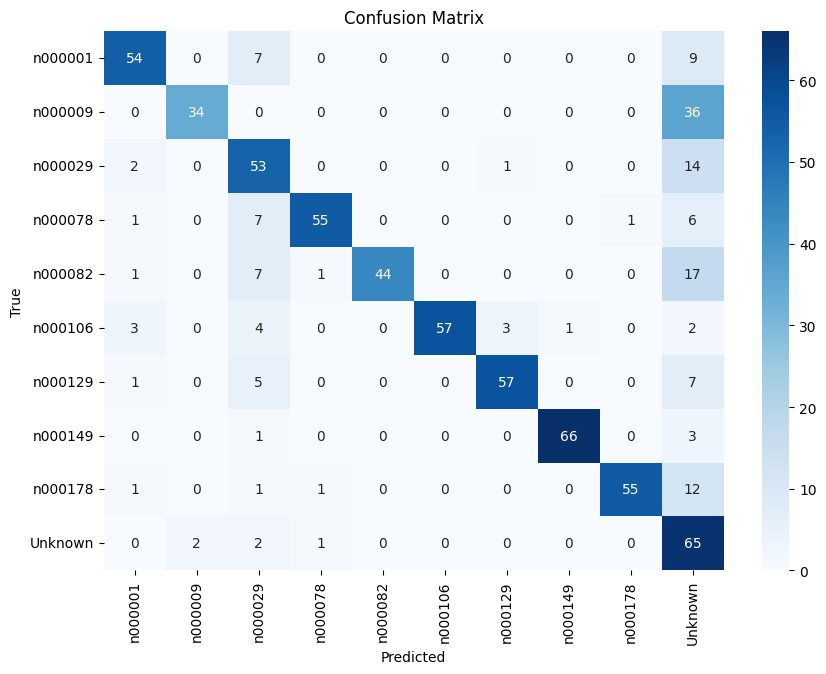

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(true_labels, predicted_labels, facenet.known_labels+["Unknown"])